# The Evolution of the Game of Thrones Characters

### Task:

1. Pick your favourite GoT characters (if you haven't seen it ask one of your class mates)

2. Rank the relevance of these 5 characters across the 5 books using the criteria you think fits better this situation. The most relevant of the five characters in book1 should get a score of 5 and the less relevant a score of 1, and the same for the rest of the books.

3.  Chart the relevance evolution of the different characters

4. Try to automate as much as possible, do not do things for each book in separate cells and then manually merge, etc.

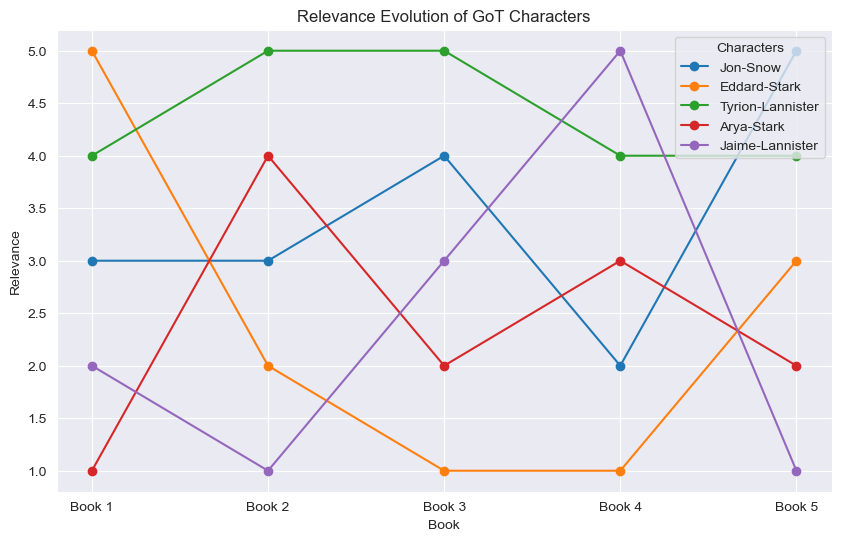

In [1]:
# Importing libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of selected characters
selected_characters = ['Jon-Snow', 'Eddard-Stark', 'Tyrion-Lannister', 'Arya-Stark', 'Jaime-Lannister']

# Function to process each book
def process_book(book_number, selected_characters):
    # Read the data
    data = pd.read_csv(f'../data/book{book_number}.csv')

    # Create a graph
    graph = nx.Graph()
    for _, edge in data.iterrows():
        graph.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

    # Calculate the degree centrality
    deg_cen = nx.degree_centrality(graph)

    # Filter the selected characters
    filtered_cen = {k: deg_cen[k] for k in selected_characters}

    # Calculate the rank for each character
    rank_series = pd.Series(filtered_cen).rank(ascending=False)
    ranked_cen = rank_series.to_dict()

    # Reverse the ranking order
    reversed_rank = {k: 6 - v for k, v in ranked_cen.items()}

    # Create a DataFrame
    df = pd.DataFrame(reversed_rank, index=[0])

    # Add the book number as a column
    df['book'] = book_number

    return df

# Create a list of DataFrames containing degree centrality
list_of_dataframes = [process_book(book_number, selected_characters) for book_number in range(1, 6)]

# Concatenate the list into a single DataFrame
df = pd.concat(list_of_dataframes)

# Set the book column as a category
df['book'] = df['book'].astype('category')

# Plot the degree centrality evolution
ax = df.plot(x='book', figsize=(10, 6), marker='o')
ax.set_ylabel("Relevance")
ax.set_xlabel("Book")
ax.set_title("Relevance Evolution of GoT Characters")
plt.xticks(range(0, 5), ['Book 1', 'Book 2', 'Book 3', 'Book 4', 'Book 5'])
plt.legend(title="Characters")
plt.show()

In [ ]:
# Importing libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of selected characters
selected_characters = ['Jon-Snow', 'Eddard-Stark', 'Tyrion-Lannister', 'Arya-Stark', 'Jaime-Lannister']

# Read the data for book 1
data = pd.read_csv('../data/book1.csv')

# Create a graph
graph = nx.Graph()
for _, edge in data.iterrows():
    graph.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Create a list of colors for each node
node_colors = []
for node in graph.nodes():
    if node in selected_characters:
        node_colors.append('red')
    else:
        node_colors.append('skyblue')

# Visualizing the graph using the random layout
plt.figure(figsize=(10, 10))
nx.draw_random(graph,
               with_labels=True,
               node_color=node_colors,
               edge_color="green",
               width=0.2,
               font_size=9,
               font_color="black")
plt.show()